<h1><center>CMPE 462 - Project 1<br>Binary Classification with Logistic Regression<br>Due: April 23, 2020, 23:59</center></h1>

## Task 1: Feature Extraction

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
testD = np.load('test_data.npy')
testL = np.load('test_labels.npy')
trainD = np.load('train_data.npy')
trainL = np.load('train_labels.npy')

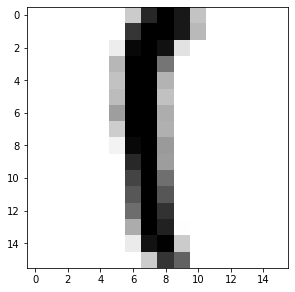

In [63]:
image1 = np.reshape(testD[0], (16, 16))
plt.imshow(image1, cmap='gray_r')

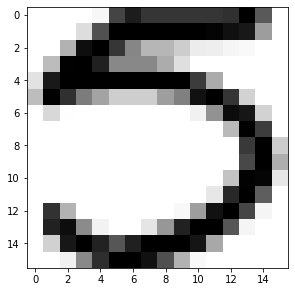

In [64]:
image5 = np.reshape(testD[264], (16, 16))
plt.imshow(image5, cmap='gray_r')

**R1:** Training Data Implementation

In [65]:
trainD_r1_i = trainD.mean((1)) 
trainD_r1_i.shape = (1561, 1)

trainD_r1_sym = np.zeros((1561, 256))
for i in range(1561):
    for j in range(16):
        for k in range(16):
            trainD_r1_sym[i, j*16+k] = trainD[i, (j+1)*16-(k+1)]
trainD_r1_sym_diff = trainD - trainD_r1_sym
trainD_r1_s = -np.linalg.norm(trainD_r1_sym_diff, axis=1)
trainD_r1_s.shape = (1561, 1)

trainD_r1 = np.hstack((trainD_r1_i, trainD_r1_s))

**R1:** Test Data Implementation

In [66]:
testD_r1_i = testD.mean((1))
testD_r1_i.shape = (424, 1)

testD_r1_sym = np.zeros((424, 256))
for i in range(424):
    for j in range(16):
        for k in range(16):
            testD_r1_sym[i, j*16+k] = testD[i, (j+1)*16-(k+1)]
testD_r1_sym_diff = testD - testD_r1_sym
testD_r1_s = -np.linalg.norm(testD_r1_sym_diff, axis=1)
testD_r1_s.shape = (424, 1)

testD_r1 = np.hstack((testD_r1_i, testD_r1_s))

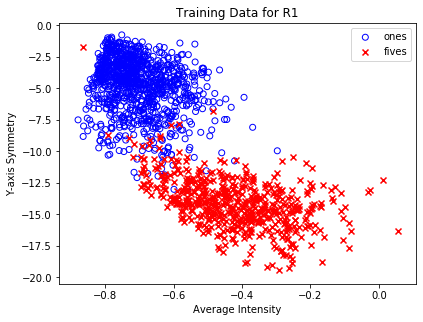

In [67]:
plt.scatter(trainD_r1[:1005, 0], trainD_r1[:1005, 1], facecolors='none', edgecolors='blue', marker='o', label='ones')
plt.scatter(trainD_r1[1005:, 0], trainD_r1[1005:, 1], c='red', marker='x', label='fives')
plt.title('Training Data for R1')
plt.xlabel('Average Intensity')
plt.ylabel('Y-axis Symmetry')
plt.legend()
plt.show()

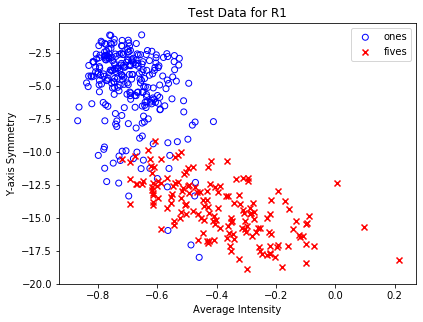

In [68]:
plt.scatter(testD_r1[:264, 0], testD_r1[:264, 1], facecolors='none', edgecolors='blue', marker='o', label='ones')
plt.scatter(testD_r1[264:, 0], testD_r1[264:, 1], c='red', marker='x', label='fives')
plt.title('Test Data for R1')
plt.xlabel('Average Intensity')
plt.ylabel('Y-axis Symmetry')
plt.legend()
plt.show()

> Two features were selected:
>    1. **Column-weighted Intensity**: Since digit 1 is more 'vertical' than digit 5, there are some particular columns in digit 1 that have much higher total intensity than in digit 5. Hence, intensity was calculated column-wise, in a way that increased the weight of these high-intensity columns. The range of pixel values were rescaled from [-1, 1] to [0, 1] and the sum of pixel values of each column was taken as a power of 10 (i.e. $10^{sum}$). Then, after adding up all 16 columns this way, total value was taken to log10 and averaged out to reach the *column-weighted* intensity value for each data point.
>    2. **Origin Symmetry**: The negative of the norm of the difference between the image and its symmetrical with respect to the *origin* (center of the image) was calculated for each data point.

**R2:** Training Data Implementation

In [69]:
trainD_r2 = np.zeros((1561, 2))

trainD_r2_sym = np.zeros((1561, 256))
tr_colsum = 0.0
tr_total = 0.0
for i in range(1561):
    for j in range(16):
        for k in range(16):
            trainD_r2_sym[i, j*16+k] = trainD[i, (16-(j+1))*16-(16-(k+1))]
            tr_colsum += (trainD[i, k*16+j]+1)/2
        tr_total += 10**tr_colsum
        tr_colsum = 0
    trainD_r2[i, 0] = np.log10(tr_total)/16
    tr_total = 0

trainD_r2_sym_diff = trainD - trainD_r2_sym
trainD_r2_s = -np.linalg.norm(trainD_r2_sym_diff, axis=1)

for i in range(1561):
    trainD_r2[i, 1] = trainD_r2_s[i]

**R2:** Test Data Implementation

In [70]:
testD_r2 = np.zeros((424, 2))

testD_r2_sym = np.zeros((424, 256))
te_colsum = 0.0
te_total = 0.0
for i in range(424):
    for j in range(16):
        for k in range(16):
            testD_r2_sym[i, j*16+k] = testD[i, (16-(j+1))*16-(16-(k+1))]
            te_colsum += (testD[i, k*16+j]+1)/2
        te_total += 10**te_colsum
        te_colsum = 0
    testD_r2[i, 0] = np.log10(te_total)/16
    te_total = 0
testD_r2_sym_diff = testD - testD_r2_sym
testD_r2_s = -np.linalg.norm(testD_r2_sym_diff, axis=1)

for i in range(424):
    testD_r2[i, 1] = testD_r2_s[i]

**R2:** Scatter plots

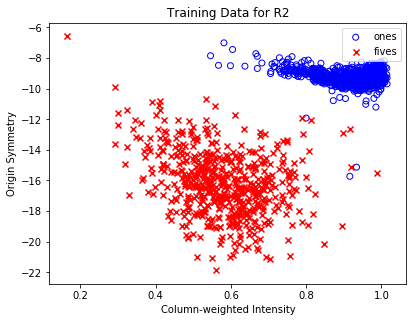

In [71]:
plt.scatter(trainD_r2[:1005, 0], trainD_r2[:1005, 1], facecolors='none', edgecolors='blue', marker='o', label='ones')
plt.scatter(trainD_r2[1005:, 0], trainD_r2[1005:, 1], c='red', marker='x', label='fives')
plt.title('Training Data for R2')
plt.xlabel('Column-weighted Intensity')
plt.ylabel('Origin Symmetry')
plt.legend()
plt.show()

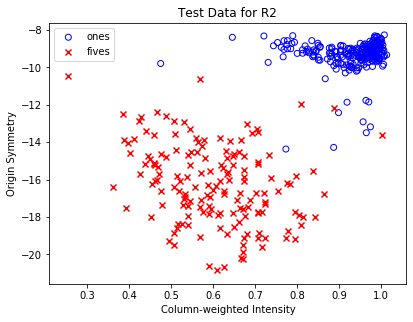

In [72]:
plt.scatter(testD_r2[:264, 0], testD_r2[:264, 1], facecolors='none', edgecolors='blue', marker='o', label='ones')
plt.scatter(testD_r2[264:, 0], testD_r2[264:, 1], c='red', marker='x', label='fives')
plt.title('Test Data for R2')
plt.xlabel('Column-weighted Intensity')
plt.ylabel('Origin Symmetry')
plt.legend()
plt.show()

## Task 2: Logistic Regression

> Derivation of the gradient of the logistic loss with respect to $w$:

\begin{equation}
w(t+1) = w(t) + \eta \hat v \tag{1}
\end{equation}

\begin{equation}
E(w) = \frac 1 N \sum_{n = 1}^N ln(1 + e^{-y_n w^T x_n}) \tag{2}
\end{equation}

\begin{equation}
\frac {1} {1 + e^{-s}} = \frac {e^{s}} {1 + e^{s}}  \tag{3}
\end{equation}

>> Calculating $\Delta E$ using $(1)$:

\begin{equation}
\Delta E = E(w(t+1)) - E(w(t)) = E(w(t) + \eta \hat v) - E(w(t))
\end{equation}

>> Using Taylor series, we can approximate $\Delta E$ as:

\begin{equation}
\Delta E = - \eta \nabla E(w)^T \hat v
\end{equation}

>> Calculating $\nabla E(w)$ using $(2)$ and $(3)$:

\begin{equation}
\nabla E(w) = \frac 1 N \sum_{n = 1}^N (ln(1 + e^{-y_n w^T x_n})' = \frac 1 N \sum_{n = 1}^N \frac {1} {1 + e^{-y_n w^T x_n}} (1 + e^{-y_n w^T x_n})' = \frac 1 N \sum_{n = 1}^N \frac {e^{-y_n w^T x_n}} {1 + e^{-y_n w^T x_n}} (-y_n w^T x_n)'
\end{equation}

\begin{equation}
\nabla E(w) = - \frac 1 N \sum_{n = 1}^N \frac {y_n x_n} {1 + e^{y_n w^T x_n}}
\end{equation}

**R1:** Logistic Regression Implementation

In [73]:
count_r1_all = []
loss_r1_all = []
w_r1_all = []
n = [0.01, 0.05, 0.1, 0.5, 1]
y = trainL
x = np.hstack((np.ones((1561, 1)), trainD_r1)).T
N = 1561
for i in range(5):
    count = []
    loss = []
    w = np.zeros((3, 1))
    for t in range(10000):
        h = np.dot(w.T, x)
        error = np.sum(np.log(1+np.e**(-y*h)))/N
        count.append(t)
        loss.append(error)
        if t > 0:
            if abs(loss[t]-loss[t-1]) < 0.00001:
                break
        g = -np.sum((y*x)/(1+np.e**(y*h)), axis=1)/N
        g.shape = (3, 1)
        w = w - n[i]*g
    count_r1_all.append(count)
    loss_r1_all.append(loss)
    w_r1_all.append(w)

**R1:** Convergence Curve

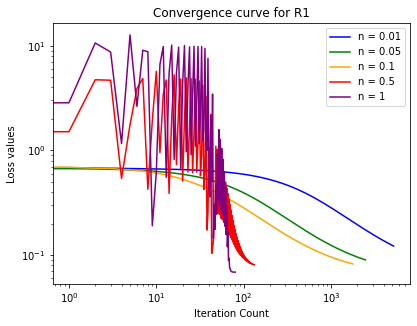

In [74]:
plt.plot(count_r1_all[0][:], loss_r1_all[0][:], c='blue', label='n = 0.01')
plt.plot(count_r1_all[1][:], loss_r1_all[1][:], c='green', label='n = 0.05')
plt.plot(count_r1_all[2][:], loss_r1_all[2][:], c='orange', label='n = 0.1')
plt.plot(count_r1_all[3][:], loss_r1_all[3][:], c='red', label='n = 0.5')
plt.plot(count_r1_all[4][:], loss_r1_all[4][:], c='purple', label='n = 1')
plt.title('Convergence curve for R1')
plt.xlabel('Iteration Count')
plt.ylabel('Loss values')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

_Accuracy Function_

In [75]:
def accuracy(data, label, w):
    correct = 0.0
    N = len(label)
    for i in range(N):
        result = np.sign(w[0]+(data[i, 0]*w[1])+(data[i, 1]*w[2]))
        if result == label[i]:
            correct += 1.0
    acc = (correct/N)*100
    return acc

**R1**: Training Accuracy

In [76]:
for i in range(5):
    print('eta = ' + str(10**(i/2) * 0.01 if i%2==0 else (0.05*10**((i-1)/2))))
    print('  ' + str(accuracy(trainD_r1, trainL, w_r1_all[i])))

eta = 0.01
  97.50160153747598
eta = 0.05
  97.56566303651505
eta = 0.1
  97.69378603459322
eta = 0.5
  97.50160153747598
eta = 1.0
  97.82190903267136


**R1**: Test Accuracy

In [77]:
for i in range(5):
    print('eta = ' + str(10**(i/2) * 0.01 if i%2==0 else (0.05*10**((i-1)/2))))
    print('  ' + str(accuracy(testD_r1, testL, w_r1_all[i])))

eta = 0.01
  95.04716981132076
eta = 0.05
  94.81132075471697
eta = 0.1
  95.04716981132076
eta = 0.5
  95.04716981132076
eta = 1.0
  95.28301886792453


**R2:** Logistic Regression Implementation

In [78]:
count_r2_all = []
loss_r2_all = []
w_r2_all = []
n = [0.01, 0.05, 0.1, 0.5, 1]
y = trainL
x = np.hstack((np.ones((1561, 1)), trainD_r2)).T
N = 1561
for i in range(5):
    count = []
    loss = []
    w = np.zeros((3, 1))
    for t in range(10000):
        h = np.dot(w.T, x)
        error = np.sum(np.log(1+np.e**(-y*h)))/N
        count.append(t)
        loss.append(error)
        if t > 0:
            if abs(loss[t]-loss[t-1]) < 0.00001:
                break
        g = -np.sum((y*x)/(1+np.e**(y*h)), axis=1)/N
        g.shape = (3, 1)
        w = w - n[i]*g
    count_r2_all.append(count)
    loss_r2_all.append(loss)
    w_r2_all.append(w)

**R2:** Convergence Curve

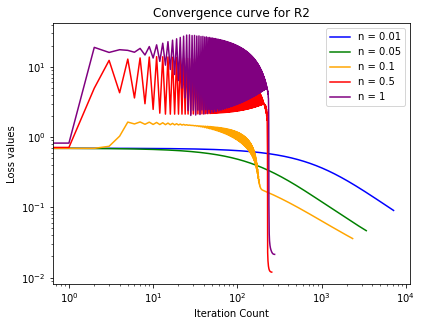

In [79]:
plt.plot(count_r2_all[0][:], loss_r2_all[0][:], c='blue', label='n = 0.01')
plt.plot(count_r2_all[1][:], loss_r2_all[1][:], c='green', label='n = 0.05')
plt.plot(count_r2_all[2][:], loss_r2_all[2][:], c='orange', label='n = 0.1')
plt.plot(count_r2_all[3][:], loss_r2_all[3][:], c='red', label='n = 0.5')
plt.plot(count_r2_all[4][:], loss_r2_all[4][:], c='purple', label='n = 1')
plt.title('Convergence curve for R2')
plt.xlabel('Iteration Count')
plt.ylabel('Loss values')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

**R2**: Training Accuracy

In [80]:
for i in range(5):
    print('eta = ' + str(10**(i/2) * 0.01 if i%2==0 else (0.05*10**((i-1)/2))))
    print('  ' + str(accuracy(trainD_r2, trainL, w_r2_all[i])))

eta = 0.01
  99.55156950672645
eta = 0.05
  99.55156950672645
eta = 0.1
  99.55156950672645
eta = 0.5
  99.55156950672645
eta = 1.0
  99.61563100576554


**R2**: Test Accuracy

In [81]:
for i in range(5):
    print('learning rate = ' + str(10**(i/2) * 0.01 if i%2==0 else (0.05*10**((i-1)/2))))
    print('accuracy ' + str(accuracy(testD_r2, testL, w_r2_all[i])))

learning rate = 0.01
accuracy 98.58490566037736
learning rate = 0.05
accuracy 98.58490566037736
learning rate = 0.1
accuracy 98.58490566037736
learning rate = 0.5
accuracy 98.34905660377359
learning rate = 1.0
accuracy 98.34905660377359


**R1:** Regularized Logistic Regression Implementation

In [82]:
count_r1_reg = []
loss_r1_reg = []
n_reg = 0.01
lam_reg = 0.00001
y = trainL
w = np.zeros((3, 1))
x = np.hstack((np.ones((1561, 1)), trainD_r1)).T
N = 1561
for t in range(10000):
    h = np.dot(w.T, x)
    error = np.sum(np.log(1+np.e**(-y*h))+(lam_reg/2)*np.linalg.norm(w)**2)/N
    count_r1_reg.append(t)
    loss_r1_reg.append(error)
    if t > 0:
        if abs(loss_r1_reg[t]-loss_r1_reg[t-1]) < 0.00001:
            break
    g = -np.sum((y*x)/(1+np.e**(y*h)+lam_reg*w), axis=1)/N
    g.shape = (3, 1)
    w = w - n_reg*g
w_r1_reg = w

**R1:** Regularized Convergence Curve

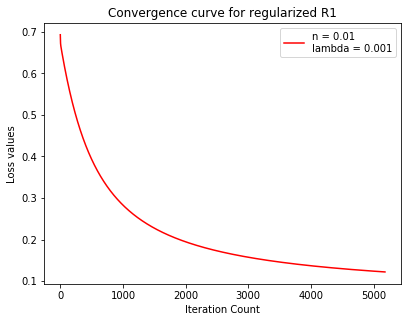

In [83]:
plt.plot(count_r1_reg[:], loss_r1_reg[:], c='red', label='n = 0.01 \nlambda = 0.001')
plt.title('Convergence curve for regularized R1')
plt.xlabel('Iteration Count')
plt.ylabel('Loss values')
plt.legend()
plt.show()

**R1**: Regularized Training Accuracy

In [84]:
# Training accuracy for regularized representation 1
print('eta = 0.01')
print('lambda = 0.00001')
print(accuracy(trainD_r1, trainL, w_r1_reg))

eta = 0.01
lambda = 0.00001
97.50160153747598


**R1**: Regularized Test Accuracy

In [85]:
# Test accuracy for regularized representation 1
print('eta = 0.01')
print('lambda = 0.00001')
print(accuracy(testD_r1, testL, w_r1_reg))

eta = 0.01
lambda = 0.00001
95.04716981132076


**R2:** Regularized Logistic Regression Implementation

In [86]:
count_r2_reg = []
loss_r2_reg = []
n_reg = 0.01
lam_reg = 0.00001
y = trainL
w = np.zeros((3, 1))
x = np.hstack((np.ones((1561, 1)), trainD_r2)).T
N = 1561
for t in range(10000):
    h = np.dot(w.T, x)
    error = np.sum(np.log(1+np.e**(-y*h))+(lam_reg/2)*np.linalg.norm(w)**2)/N
    count_r2_reg.append(t)
    loss_r2_reg.append(error)
    if t > 0:
        if abs(loss_r2_reg[t]-loss_r2_reg[t-1]) < 0.00001:
            break
    g = -np.sum((y*x)/(1+np.e**(y*h)+lam_reg*w), axis=1)/N
    g.shape = (3, 1)
    w = w - n_reg*g
w_r2_reg = w

**R2:** Regularized Convergence Curve

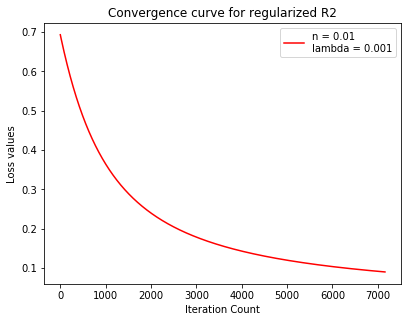

In [87]:
plt.plot(count_r2_reg[:], loss_r2_reg[:], c='red', label='n = 0.01 \nlambda = 0.001')
plt.title('Convergence curve for regularized R2')
plt.xlabel('Iteration Count')
plt.ylabel('Loss values')
plt.legend()
plt.show()

**R2**: Regularized Training Accuracy

In [88]:
# Training accuracy for regularized representation 2
print('eta = 0.01')
print('lambda = 0.00001')
print(accuracy(trainD_r2, trainL, w_r2_reg))

eta = 0.01
lambda = 0.00001
99.55156950672645


**R2**: Regularized Test Accuracy

In [89]:
# Test accuracy for regularized representation 2
print('eta = 0.01')
print('lambda = 0.00001')
print(accuracy(testD_r2, testL, w_r2_reg))

eta = 0.01
lambda = 0.00001
98.58490566037736


**R1:** 5-fold Data Split

In [90]:
from random import seed
from random import randrange

seed(1)
split_data_r1 = []
split_label_r1 = []
data_copy = trainD_r1
label_copy = trainL
for i in range(5):
    fold_data = []
    fold_label = []
    while len(fold_label) < int(1561/5):
        ind = randrange(len(label_copy))
        fold_data.append(data_copy[ind])
        data_copy = np.delete(data_copy, ind, 0)
        fold_label.append(label_copy[ind])
        label_copy = np.delete(label_copy, ind)
    fold_data = np.array(fold_data)
    fold_label = np.array(fold_label)
    split_data_r1.append(fold_data)
    split_label_r1.append(fold_label)

fivefold_data_r1 = []
fivefold_label_r1 = []
for i in range(5):
    fivefold_data_r1.append(np.vstack((split_data_r1[(i+1)%5], split_data_r1[(i+2)%5], split_data_r1[(i+3)%5], split_data_r1[(i+4)%5])))
    fivefold_label_r1.append(np.hstack((split_label_r1[(i+1)%5], split_label_r1[(i+2)%5], split_label_r1[(i+3)%5], split_label_r1[(i+4)%5])))

**R1:** 5-fold Cross Validation

In [91]:
count_r1_reg_fold = []
loss_r1_reg_fold = []
w_r1_reg_all = []
n_reg = 0.01
lam = [0.00001, 0.0001, 0.001, 0.01, 0.1]
N = int(1561/5)*4
for i in range(5):
    x = np.hstack((np.ones((N, 1)), fivefold_data_r1[i])).T
    y = fivefold_label_r1[i]
    for j in range(5):
        count = []
        loss = []
        w = np.zeros((3, 1))
        for t in range(10000):
            h = np.dot(w.T, x)
            error = np.sum(np.log(1+np.e**(-y*h))+(lam[j]/2)*np.linalg.norm(w)**2)/N
            count.append(t)
            loss.append(error)
            if t > 0:
                if abs(loss[t]-loss[t-1]) < 0.00001:
                    break
            g = -np.sum((y*x)/(1+np.e**(y*h)+lam[j]*w), axis=1)/N
            g.shape = (3, 1)
            w = w - n_reg*g
        count_r1_reg_fold.append(count)
        loss_r1_reg_fold.append(loss)
        w_r1_reg_all.append(w)

**R1:** Table

Representation 1:


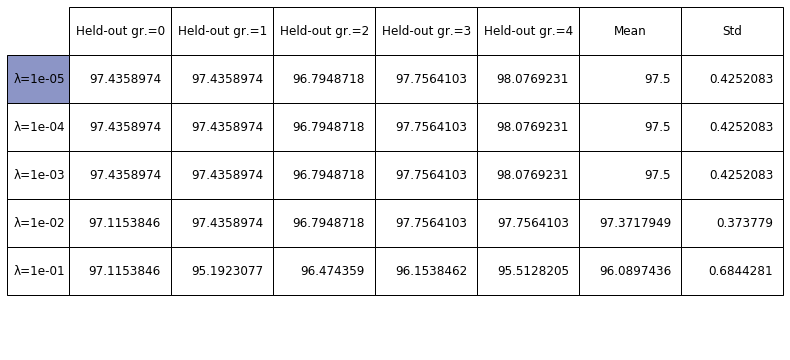

In [92]:
print('Representation 1:')
table_r1 = np.zeros((5, 7))
for i in range(5):
    for j in range(5):
        table_r1[i][j] = accuracy(split_data_r1[j], split_label_r1[j], w_r1_reg_all[j*5+i])
    table_r1[i][5] = np.mean(table_r1[i, 0:5])
    table_r1[i][6] = np.std(table_r1[i, 0:5])

color_best = [0.54901961, 0.58559016, 0.77517878, 1.] 
colors = np.zeros((5, 4))
colors[np.argmax(table_r1[:, 5]), :] = color_best

plt.rcParams['figure.figsize'] = [6.4, 4.8]
fig, axs = plt.subplots(2, 1)
clust_data = table_r1
collabel=("Held-out gr.=0", "Held-out gr.=1", "Held-out gr.=2", "Held-out gr.=3", "Held-out gr.=4", "Mean", "Std")
rowlabel=("λ=1e-05", "λ=1e-04", "λ=1e-03", "λ=1e-02", "λ=1e-01")
axs[0].axis('tight')
axs[0].axis('off')
the_table = axs[0].table(cellText=np.round(clust_data, 7), rowLabels=rowlabel, rowColours=colors, colLabels=collabel, loc='center')
the_table.scale(2, 4)
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
axs[1].axis('off')
plt.show()

**R2:** 5-fold Data Split

In [93]:
from random import seed
from random import randrange

seed(1)
split_data_r2 = []
split_label_r2 = []
data_copy = trainD_r2
label_copy = trainL
for i in range(5):
    fold_data = []
    fold_label = []
    while len(fold_label) < int(1561/5):
        ind = randrange(len(label_copy))
        fold_data.append(data_copy[ind])
        data_copy = np.delete(data_copy, ind, 0)
        fold_label.append(label_copy[ind])
        label_copy = np.delete(label_copy, ind)
    fold_data = np.array(fold_data)
    fold_label = np.array(fold_label)
    split_data_r2.append(fold_data)
    split_label_r2.append(fold_label)

fivefold_data_r2 = []
fivefold_label_r2 = []
for i in range(5):
    fivefold_data_r2.append(np.vstack((split_data_r2[(i+1)%5], split_data_r2[(i+2)%5], split_data_r2[(i+3)%5], split_data_r2[(i+4)%5])))
    fivefold_label_r2.append(np.hstack((split_label_r2[(i+1)%5], split_label_r2[(i+2)%5], split_label_r2[(i+3)%5], split_label_r2[(i+4)%5])))

**R2:** 5-fold Cross Validation

In [94]:
count_r2_reg_fold = []
loss_r2_reg_fold = []
w_r2_reg_all = []
n_reg = 0.01
lam = [0.00001, 0.0001, 0.001, 0.01, 0.1]
N = int(1561/5)*4
for i in range(5):
    x = np.hstack((np.ones((N, 1)), fivefold_data_r2[i])).T
    y = fivefold_label_r2[i]
    for j in range(5):
        count = []
        loss = []
        w = np.zeros((3, 1))
        for t in range(10000):
            h = np.dot(w.T, x)
            error = np.sum(np.log(1+np.e**(-y*h))+(lam[j]/2)*np.linalg.norm(w)**2)/N
            count.append(t)
            loss.append(error)
            if t > 0:
                if abs(loss[t]-loss[t-1]) < 0.00001:
                    break
            g = -np.sum((y*x)/(1+np.e**(y*h)+lam[j]*w), axis=1)/N
            g.shape = (3, 1)
            w = w - n_reg*g
        count_r2_reg_fold.append(count)
        loss_r2_reg_fold.append(loss)
        w_r2_reg_all.append(w)

**R2:** Table

Representation 2:


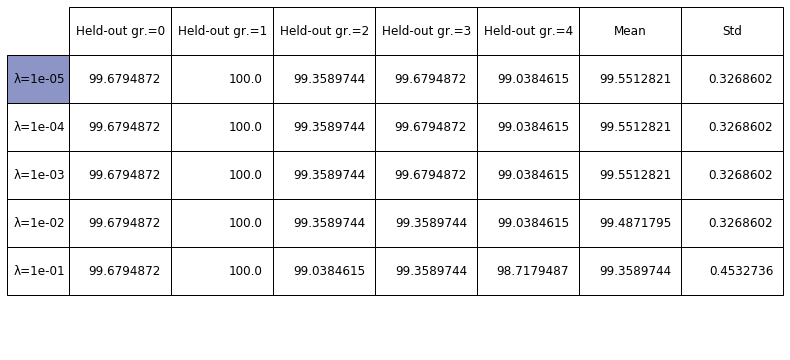

In [95]:
print('Representation 2:')
table_r2 = np.zeros((5, 7))
for i in range(5):
    for j in range(5):
        table_r2[i][j] = accuracy(split_data_r2[j], split_label_r2[j], w_r2_reg_all[j*5+i])
    table_r2[i][5] = np.mean(table_r2[i, 0:5])
    table_r2[i][6] = np.std(table_r2[i, 0:5])

color_best = [0.54901961, 0.58559016, 0.77517878, 1.] 
colors = np.zeros((5, 4))
colors[np.argmax(table_r2[:, 5]), :] = color_best

plt.rcParams['figure.figsize'] = [6.4, 4.8]
fig, axs = plt.subplots(2, 1)
clust_data = table_r2
collabel=("Held-out gr.=0", "Held-out gr.=1", "Held-out gr.=2", "Held-out gr.=3", "Held-out gr.=4", "Mean", "Std")
rowlabel=("λ=1e-05", "λ=1e-04", "λ=1e-03", "λ=1e-02", "λ=1e-01")
axs[0].axis('tight')
axs[0].axis('off')
the_table = axs[0].table(cellText=np.round(clust_data, 7), rowLabels=rowlabel, rowColours=colors, colLabels=collabel, loc='center')
the_table.scale(2, 4)
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
axs[1].axis('off')
plt.show()

## Task 3: Evaluation

Best $\eta$ = 0.01. Larger learning rates performed slightly better in terms of having the minimum loss values when the learning was terminated but their convergence curves were not smooth and were fluctuating a lot. We spoke to Prof. Baytaş about this and she advised against using fluctuating learning rates.

Best $\lambda$ = 0.0001 Small lambda values generally perform better than larger ones but as we go smaller there is not any difference between them. We picked the smallest lambda as regularization does not seem to help.

**R1:** Without Regularization

In [96]:
count = []
loss = []
n = 0.01
y = trainL
x = np.hstack((np.ones((1561, 1)), trainD_r1)).T
N = 1561
w = np.zeros((3, 1))
for t in range(10000):
    h = np.dot(w.T, x)
    error = np.sum(np.log(1+np.e**(-y*h)))/N
    count.append(t)
    loss.append(error)
    if t > 0:
        if abs(loss[t]-loss[t-1]) < 0.00001:
            break
    g = -np.sum((y*x)/(1+np.e**(y*h)), axis=1)/N
    g.shape = (3, 1)
    w = w - n*g
print('Training accuracy: \t' + str(accuracy(trainD_r1, trainL, w)))
print('Test accuracy: \t\t' + str(accuracy(testD_r1, testL, w)))

Training accuracy: 	97.50160153747598
Test accuracy: 		95.04716981132076


**R1:** With Regularization

In [97]:
count = []
loss = []
n = 0.01
lam = 0.0001
y = trainL
w = np.zeros((3, 1))
x = np.hstack((np.ones((1561, 1)), trainD_r1)).T
N = 1561
for t in range(10000):
    h = np.dot(w.T, x)
    error = np.sum(np.log(1+np.e**(-y*h))+(lam/2)*np.linalg.norm(w)**2)/N
    count.append(t)
    loss.append(error)
    if t > 0:
        if abs(loss[t]-loss[t-1]) < 0.00001:
            break
    g = -np.sum((y*x)/(1+np.e**(y*h)+lam*w), axis=1)/N
    g.shape = (3, 1)
    w = w - n*g
print('Training accuracy: \t' + str(accuracy(trainD_r1, trainL, w)))
print('Test accuracy: \t\t' + str(accuracy(testD_r1, testL, w)))

Training accuracy: 	97.50160153747598
Test accuracy: 		95.04716981132076


**R2:** Without Regularization

In [98]:
count = []
loss = []
n = 0.01
y = trainL
x = np.hstack((np.ones((1561, 1)), trainD_r2)).T
N = 1561
w = np.zeros((3, 1))
for t in range(10000):
    h = np.dot(w.T, x)
    error = np.sum(np.log(1+np.e**(-y*h)))/N
    count.append(t)
    loss.append(error)
    if t > 0:
        if abs(loss[t]-loss[t-1]) < 0.00001:
            break
    g = -np.sum((y*x)/(1+np.e**(y*h)), axis=1)/N
    g.shape = (3, 1)
    w = w - n*g
print('Training accuracy: \t' + str(accuracy(trainD_r2, trainL, w)))
print('Test accuracy: \t\t' + str(accuracy(testD_r2, testL, w)))

Training accuracy: 	99.55156950672645
Test accuracy: 		98.58490566037736


**R2:** With Regularization

In [99]:
count = []
loss = []
n = 0.01
lam = 0.0001
y = trainL
w = np.zeros((3, 1))
x = np.hstack((np.ones((1561, 1)), trainD_r2)).T
N = 1561
for t in range(10000):
    h = np.dot(w.T, x)
    error = np.sum(np.log(1+np.e**(-y*h))+(lam/2)*np.linalg.norm(w)**2)/N
    count.append(t)
    loss.append(error)
    if t > 0:
        if abs(loss[t]-loss[t-1]) < 0.00001:
            break
    g = -np.sum((y*x)/(1+np.e**(y*h)+lam*w), axis=1)/N
    g.shape = (3, 1)
    w = w - n*g
print('Training accuracy: \t' + str(accuracy(trainD_r2, trainL, w)))
print('Test accuracy: \t\t' + str(accuracy(testD_r2, testL, w)))

Training accuracy: 	99.55156950672645
Test accuracy: 		98.58490566037736


**(15 points)** Visualize the decision boundary (the line that is given by $\mathbf{w}^{T}x=0$) obtained from the logistic regression classifier learned without regularization. For this purpose, use only Representation 1. Provide two scatter plots for training and test data points with the decision boundary shown on each of the plots.

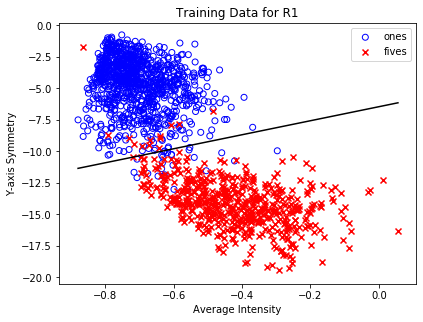

In [100]:
plot_x = np.array([min(trainD_r1[:, 0]), max(trainD_r1[:, 0])])
plot_y = -(w_r1_all[0][1]*plot_x+w_r1_all[0][0])/w_r1_all[0][2]
plt.scatter(trainD_r1[:1005, 0], trainD_r1[:1005, 1], facecolors='none', edgecolors='blue', marker='o', label='ones')
plt.scatter(trainD_r1[1005:, 0], trainD_r1[1005:, 1], c='red', marker='x', label='fives')
plt.plot(plot_x, plot_y, color='black')
plt.title('Training Data for R1')
plt.xlabel('Average Intensity')
plt.ylabel('Y-axis Symmetry')
plt.legend()
plt.show()

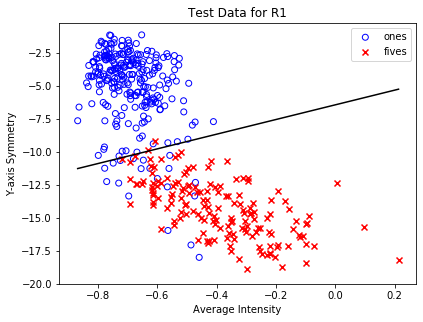

In [101]:
plot_x = np.array([min(testD_r1[:, 0]), max(testD_r1[:, 0])])
plot_y = -(w_r1_all[0][1]*plot_x+w_r1_all[0][0])/w_r1_all[0][2]
plt.scatter(testD_r1[:264, 0], testD_r1[:264, 1], facecolors='none', edgecolors='blue', marker='o', label='ones')
plt.scatter(testD_r1[264:, 0], testD_r1[264:, 1], c='red', marker='x', label='fives')
plt.plot(plot_x, plot_y, color='black')
plt.title('Test Data for R1')
plt.xlabel('Average Intensity')
plt.ylabel('Y-axis Symmetry')
plt.legend()
plt.show()

Comments

> * Regularization did not improve the generalization performance, because there was already very little difference between training and test accuracy, and changing lambda values did not effect accuracy values at all. This was the case for both representations. Since there were no improvements by regularization, we can conclude that we had no overfitting for either representation.
> *  Representation 2 separated the datapoints better (from %95 accuracy to %98.5).
> * We would do the following:
    - try to add features that better separate the datapoints. 
    - run pocket algorithm before implementing logistic regression to improve weights (this would also give us a head start and decrease iteration count). 
    - decrease the $10^{-5}$ limit, the absolute difference between the current loss value and the loss value of the previous step that we used to terminate gradient descent, further. 
    - use neural network approach instead of logistic regression with gradient descent.